In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import csv
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/ground truth data/ground_truth_subjects.csv", header = None)
subjects = df[0].values

In [6]:
def get_file_paths(subjects):
    # List that stores path to CSV training files
    file_paths = [] # Initiated list for storing path to dataset
    for subject in subjects:
        # ground_truth -> subject -> peizo signals

        piezo_path = f"/content/drive/MyDrive/ground truth data/ground_truth/{subject}/{subject[10:]}.csv"
        # ground_truth -> subject -> breathrates

        breath_path = f"/content/drive/MyDrive/ground truth data/ground_truth/{subject}/breathrates.csv"
        # ground_truth -> subject -> heartrates

        heart_path = f"/content/drive/MyDrive/ground truth data/ground_truth/{subject}/heartrates.csv"
        # ground_truth -> subject -> jpeaks

        jpeaks_path = f"/content/drive/MyDrive/ground truth data/ground_truth/{subject}/jpeaks.csv"
        # ground_truth -> subject -> movementvalues
        file_paths.append((piezo_path, breath_path, heart_path, jpeaks_path))
    return file_paths

# Training + Testing dataset addresses stored
file_paths = get_file_paths(subjects)
print(file_paths)


[('/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526417507/1526417507.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526417507/breathrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526417507/heartrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526417507/jpeaks.csv'), ('/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526591202/1526591202.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526591202/breathrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526591202/heartrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526591202/jpeaks.csv'), ('/content/drive/MyDrive/ground truth data/ground_truth/Subject42_1527280030/1527280030.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject42_1527280030/breathrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject42_1527

# Cumulative breathrate and heartrate

In [7]:
interval = 6780
cumu_breathrates = []
cumu_heartrates = []
cumu_piezo = []
# For 1st 4 datasets
for sub in range(4):

    piezo_0 = pd.read_csv(file_paths[sub][0], header = None).iloc[:, 0].values
    breathrates = pd.read_csv(file_paths[sub][1], header = None).iloc[:, 1].values
    heartrates = pd.read_csv(file_paths[sub][2], header=None).iloc[:, 1].values

    cumu_breathrates += list(breathrates)
    cumu_heartrates += list(heartrates)

    x = []

    for i in range(8):
        sum = 0
        count = 0
        for  j in range(interval):
            if (piezo_0[j + interval * i]>200):
                sum += piezo_0[j + interval * i]
                count += 1

        sum /= count
        x += [sum]

    cumu_piezo += x

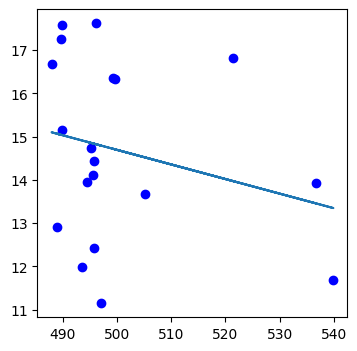

In [8]:
# remove piezo values that are y = -1 or y is above 30 for breathrates
new_piezo = []
new_breathrates = []
count = 0
for elem in np.array(cumu_breathrates):
    count +=1
    if (elem==-1 or elem>30):
        continue
    new_breathrates += [elem]
    new_piezo += [np.array(cumu_piezo)[count-1]]

new_piezo = np.array(new_piezo)
new_breathrates = np.array(new_breathrates)

f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)

plt.scatter(new_piezo, new_breathrates, color = "blue")


m, b = np. polyfit(new_piezo,new_breathrates, 1)
plt.plot(new_piezo, m*new_piezo+ b)
plt.show()

In [9]:
new_breathrates

array([16.82, 17.59, 16.67, 17.25, 12.92, 15.15, 11.99, 14.73, 17.62,
       14.44, 14.12, 12.43, 11.15, 13.96, 11.68, 16.35, 16.34, 13.67,
       13.94])

# 1. Linear regression model for breathrates

In [10]:

new_breathrates=np.array(new_breathrates)
new_breathrates=new_breathrates.reshape(-1,1)

In [11]:
regressor_breath = LinearRegression()
regressor_breath.fit(new_piezo.reshape(-1, 1), new_breathrates)


LinearRegression()

In [12]:
pred_data = []
cumu_breathrates =[]
# For 1st 4 datasets
for file in range(4, 6, 1):
    # if (sub == 1) :
    #     continue
    piezo_0 = pd.read_csv(file_paths[sub][0], header = None).iloc[:, 0].values # Numpy 1D array
    breathrates = pd.read_csv(file_paths[sub][1], header = None).iloc[:, 1].values # Numpy 1D array

    cumu_breathrates += list(breathrates)
    x = [] # 8 membered list - Averaged out peizo

    # Average the peizo
    for i in range(8):
        sum = 0
        count = 0
        for  j in range(interval):
            if (piezo_0[j + interval * i]>200):
                sum += piezo_0[j + interval * i]
                count += 1

        sum /= count
        x += [sum]

    pred_data += x

pred_data = np.array(pred_data)
actual_breathrate = np.array(cumu_breathrates)
#print(pred_data)
print(actual_breathrate)

[11.68 16.35 16.34 13.67 13.94 -1.   -1.   -1.   11.68 16.35 16.34 13.67
 13.94 -1.   -1.   -1.  ]


In [13]:
new_piezo=new_piezo.reshape(-1,1)

In [14]:
pred_final_breath=regressor_breath.predict(new_piezo)
print(pred_final_breath)

[[13.97486779]
 [15.03736679]
 [15.10149632]
 [15.04301592]
 [15.06867071]
 [15.03934597]
 [14.91514278]
 [14.85838493]
 [14.8281253 ]
 [14.8398363 ]
 [14.84396374]
 [14.83505244]
 [14.79342483]
 [14.8814091 ]
 [13.34975446]
 [14.72177153]
 [14.70734039]
 [14.52309381]
 [13.45793688]]


In [15]:
regressor_breath.score(new_piezo, pred_final_breath)

1.0

[[13.34975446]
 [14.72177153]
 [14.70734039]
 [14.52309381]
 [13.45793688]
 [14.69853352]
 [14.70261124]
 [14.69582831]
 [13.34975446]
 [14.72177153]
 [14.70734039]
 [14.52309381]
 [13.45793688]
 [14.69853352]
 [14.70261124]
 [14.69582831]]


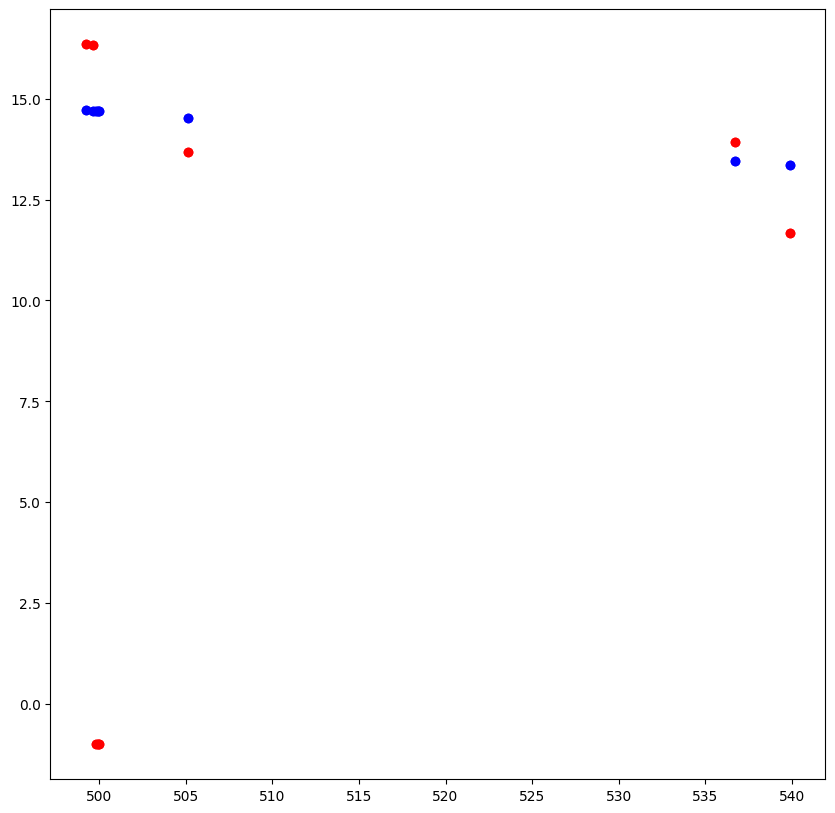

In [16]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

pred_final = regressor_breath.predict(pred_data.reshape(-1, 1))
print(pred_final)
plt.scatter(pred_data.reshape(-1, 1), pred_final.reshape(-1, 1), color = "blue")
plt.scatter(pred_data.reshape(-1, 1), actual_breathrate.reshape(-1, 1), color = "red")
plt.show()

# Output : BLUE points Predicted values of breathrates
#          RED points Actual values of breathrates



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [18]:
X_train,X_test,y_train,y_test = train_test_split(new_piezo.reshape(-1, 1), new_breathrates,test_size=0.2,random_state=0)

In [19]:
linregressor_breath = LinearRegression()
linregressor_breath.fit(X_train,y_train)

LinearRegression()

In [25]:
pred_final_breath2=regressor_breath.predict(X_test)
pred_final_breath2

array([[14.84396374],
       [15.03736679],
       [14.8281253 ],
       [13.45793688]])

In [27]:
mse_linearreg = mean_squared_error(y_test, pred_final_breath2)
mse_linearreg

3.766752247693547

In [23]:

decision_regressor_breath = DecisionTreeRegressor()
decision_regressor_breath.fit(new_piezo.reshape(-1, 1), new_breathrates)


DecisionTreeRegressor()

In [28]:
pred_final_breath3=decision_regressor_breath.predict(X_test)
print(pred_final_breath3)

[14.12 17.59 17.62 13.94]


In [29]:
mse_decisiontree = mean_squared_error(y_test, pred_final_breath3)
mse_decisiontree

0.0

In [30]:

randforest_regressor_breath = RandomForestRegressor(random_state=42)
randforest_regressor_breath.fit(X_train,y_train)

<ipython-input-30-f4f2fabf3960>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randforest_regressor_breath.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

In [31]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=randforest_regressor_breath, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [32]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [33]:
pred_breath_rate=best_model.predict(X_test)
pred_breath_rate

array([14.17299238, 14.58455517, 14.14937484, 14.01954601])

In [34]:
mse_randforest = mean_squared_error(y_test, pred_breath_rate)
mse_randforest

5.271768352431332

In [35]:
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


Comparison of mse values

Text(0.5, 1.0, 'Comparison of mse values')

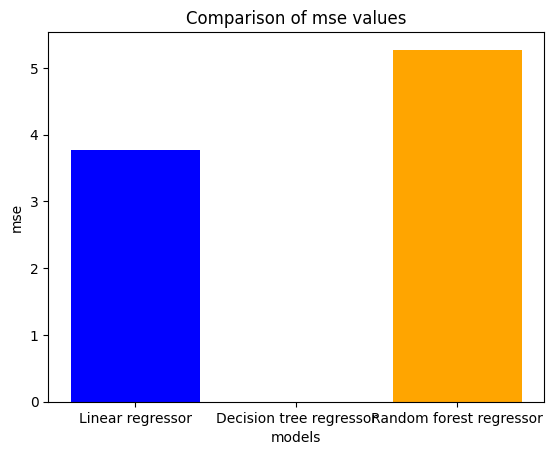

In [36]:
quantities = ['Linear regressor', 'Decision tree regressor', 'Random forest regressor']
values = [mse_linearreg,mse_decisiontree,mse_randforest]
colors = ['blue', 'green', 'orange']

# Plotting the bar graph
plt.bar(quantities, values, color=colors)

# Adding labels and title
plt.xlabel('models')
plt.ylabel('mse')
plt.title('Comparison of mse values')